### Project 1

Project description: 
- Read data into Jupyter notebook, use pandas to import data into a data frame
- preprocess data: explore data, address missing data, categorical data, if there is any, and data scaling. Justify the type of scaling used in this project. 
- train your dataset using all the linear regression models you've learned so far. If your model has a scaling parameter(s) use Grid Search to find the best scaling parameter. Use plots and graphs to help you get a better glimpse of the results. 
- Then use cross validation to find average training and testing score. 
- Your submission should have at least the following regression models: KNN repressor, linear regression, Ridge, Lasso, polynomial regression, SVM both simple and with kernels. 
- Finally find the best repressor for this dataset and train your model on the entire dataset using the best parameters and predict the market price for the test_set.
- submit IPython notebook. Use markdown to provide an inline report for this project.

##### <font color = 'red'> Important note: All the group members should participate in completing this project.  This includes coding, preparing report and testing the models. 

Reading data from csv file and making a dataframe using it.

In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv('bitcoin_dataset.csv')

Imputing missing data. 
We have used the previous value imputation technique to treat the missing values.

In [2]:
data.fillna(method = 'pad',  inplace=True)

In [3]:
data.btc_n_orphaned_blocks =data.btc_n_orphaned_blocks.astype('category')

## Finding correlation
Checking correlation of target variable with other predictor variables. So that the columns with high correlation can be removed. It is important to avoid the overfitting of our models. 

In [4]:
data.corr()

,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_transactions_per_block,btc_median_confirmation_time,btc_hash_rate,btc_difficulty,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
btc_market_price,1.000000,0.393579,0.999784,0.868841,0.674818,0.544033,0.544125,0.281177,0.920876,0.915671,...,-0.013517,0.815507,0.663917,0.569603,0.680048,0.558416,0.567281,0.111734,0.050894,0.968308
btc_total_bitcoins,0.393579,1.000000,0.385621,0.286219,0.779819,0.852794,0.832776,0.675648,0.489650,0.500859,...,-0.078993,0.373885,0.821856,0.834239,0.783986,0.815956,0.801724,0.293595,0.215718,0.388928
btc_market_cap,0.999784,0.385621,1.000000,0.869293,0.673146,0.541357,0.541746,0.277893,0.922108,0.916842,...,-0.012925,0.805635,0.660761,0.566896,0.678136,0.555714,0.564836,0.112418,0.051361,0.968534
btc_trade_volume,0.868841,0.286219,0.869293,1.000000,0.521387,0.416131,0.430445,0.218843,0.758364,0.753524,...,-0.009400,0.689996,0.539453,0.453805,0.525605,0.442148,0.449879,0.097334,0.056055,0.896043
btc_blocks_size,0.674818,0.779819,0.673146,0.521387,1.000000,0.956191,0.946993,0.513376,0.826141,0.840921,...,-0.029983,0.446105,0.966840,0.950442,0.999785,0.952262,0.961439,0.252480,0.154697,0.672629
btc_avg_block_size,0.544033,0.852794,0.541357,0.416131,0.956191,1.000000,0.977887,0.558875,0.687581,0.705240,...,-0.036717,0.335611,0.967663,0.977940,0.954478,0.976108,0.969182,0.296547,0.191663,0.553090
btc_n_transactions_per_block,0.544125,0.832776,0.541746,0.430445,0.946993,0.977887,1.000000,0.563395,0.670598,0.692862,...,-0.036007,0.318210,0.966663,0.980739,0.945276,0.976423,0.975156,0.298024,0.188603,0.563285
btc_median_confirmation_time,0.281177,0.675648,0.277893,0.218843,0.513376,0.558875,0.563395,1.000000,0.354346,0.378241,...,-0.055215,0.183495,0.518345,0.549277,0.518870,0.514467,0.539214,0.307848,0.215433,0.284652
btc_hash_rate,0.920876,0.489650,0.922108,0.758364,0.826141,0.687581,0.670598,0.354346,1.000000,0.990155,...,-0.015868,0.695143,0.769263,0.699357,0.829537,0.692128,0.712023,0.161671,0.081981,0.887864
btc_difficulty,0.915671,0.500859,0.916842,0.753524,0.840921,0.705240,0.692862,0.378241,0.990155,1.000000,...,-0.016263,0.684337,0.774771,0.704599,0.844233,0.698189,0.721239,0.164135,0.082806,0.879419


### Plotting the graph for correlation among variables

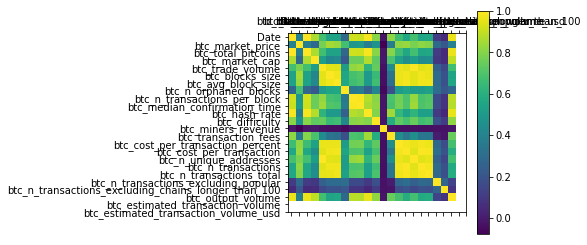

In [5]:
import matplotlib.pyplot as plt
plt.matshow(data.corr())
plt.xticks(range(len(data.columns)), data.columns)
plt.yticks(range(len(data.columns)), data.columns)
plt.colorbar()
plt.show()

## Droping unnecessary columns & Min-Max scaling
Drop the 'Date' column because it is not adding value to predict the target variable.
Drop the 'btc_market_cap' and 'btc_miners_revenue' because they both are highly correlated with our target variable.
So, if we don't remove those columns it will affect the accuracy of our model and model will overfit.

In addition to that, we are going to apply scaling on our dataset because all the columns have vary high variability. The scaling method we have applied here is min-max scalling. We will apply all our models on the scaled data only

In [6]:
data_new = data.drop(['Date','btc_market_cap', 'btc_miners_revenue'], axis = 1)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_d1 = scaler.fit_transform(data_new)
train_d2 = pd.DataFrame(train_d1,columns=data_new.columns)

# Linear Regression Model
We have applied our first model linear regression on the data and have splitted the data in training and testing data for that.

### train-test split
Now, we devided the entire data into training and testing datasets. So that we can train our models on train dataset and check the accuracy of the models on test dataset.

In [7]:
import warnings
warnings.filterwarnings("ignore")

X = train_d2.iloc[:, 1:21]
y = train_d2.iloc[:, 0]

X = pd.DataFrame(X)
y = pd.DataFrame(y)

import random
random.seed(1234)

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=0)

import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cross_validation import cross_val_score

# # Create linear regression object
clf = linear_model.LinearRegression() 
reg = clf.fit(X_train, y_train)

print('linear model intercept: {}'
     .format(reg.intercept_))

print('linear model coeff:\n {}'
      .format(reg.coef_))

# #train score
scores =  cross_val_score(clf, X_train, y_train,cv=5)
print("R-squared score for training",scores.mean())

#test score

pred_reg = reg.predict(X_test)
scores = cross_val_score(reg, y_test,pred_reg,cv=5)
print("R-squared score for testing", scores.mean())

#MSE
print ("Mean Square error", mean_squared_error(y_test, reg.predict(X_test)))

linear model intercept: [-0.00440126]
linear model coeff:
 [[ 0.0081277   0.010289    1.19446972 -0.01241125  0.00771496  0.02856796
   0.01205161  0.06654293  0.32037189  0.05117762  0.00680634  0.18769571
   0.05260899  0.09378978 -1.30577479 -0.06978072 -0.05410452 -0.0331702
  -0.026893    0.59362818]]
R-squared score for training 0.974105751659
R-squared score for testing 0.979902577665
Mean Square error 0.000329838203834


#### Linear model accuracy
The R-square value for training model is 97.41% and the R-square value for testing model is 97.99% which is good. The values of the coefficients for all predictor variables are also mentioned in the above output.
Linear regression model doesn't have any hyper parameters. So, we are not applying any hyper parameter tuning algorithm here.

# KNN Model

Below is the K-nearesr neighbors model. We have applied Grid Search logic for the hyper parameter tuning. After that we have done cross validation to check the r-square values of training and testing data sets. Which is 98.77% and 98.81% respectively.

The best estimator value we are getting is 10 using grid search and that's what we have considered in the model.

In [8]:
random.seed(1234)

# Grid Search for Parameter Tuning 
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.model_selection import GridSearchCV

# prepare a range of alpha values to test
k_range = np.array([1,2,3,4,5,6,7,8,9,10])

knn = KNeighborsRegressor(n_neighbors=k_range)
grid = GridSearchCV(knn, param_grid=dict(n_neighbors=k_range), cv= 5)
grid.fit(X, y)
print("grid:",grid)

# summarize the results of the grid search
print("grid.best_score_:",grid.best_score_)
print("grid.best_estimator_:",grid.best_estimator_.n_neighbors)

# Model for best neighbour
model = KNeighborsRegressor(n_neighbors=10)
knn = model.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

# train score
scores =  cross_val_score(model, X_train, y_train,cv=5)
print("R-squared score for training",scores.mean())

#test score
scores = cross_val_score(knn,y_test,knn_pred,cv=5)
print("R-squared score for testing", scores.mean())

#MSE
print ("Mean Square error", mean_squared_error(y_test, knn.predict(X_test)))

grid: GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1,
          n_neighbors=array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]), p=2,
          weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)
grid.best_score_: -1.66906363028
grid.best_estimator_: 10
R-squared score for training 0.987782069399
R-squared score for testing 0.988105121624
Mean Square error 0.000213874440035


#### KNN model accuracy
The R-square value for training model is 98.77% and the R-square value for testing model is 98.81% which is really good. 

# RIDGE Regression

Below is the Ridge Regression model. We have applied Grid Search logic for the hyper parameter tuning. After that we have done cross validation to check the r-square values of training and testing data sets. Which is 74% and 11% respectively.

The best alpha value we are getting from the grid search is '100' and we have fed the same to the model.

In [9]:
random.seed(1234)

# Grid Search for Algorithm Tuning
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# prepare a range of alpha values to test
alphas = np.array([100,10,1,0.1,0.01,0.001,0.0001,0])

# create and fit a ridge regression model, testing each alpha
ridge_model = Ridge()
grid = GridSearchCV(estimator=ridge_model, param_grid=dict(alpha=alphas), cv=5)

grid.fit(X, y)
print("grid:",grid)

# summarize the results of the grid search
print("grid.best_score_:",grid.best_score_)
print("grid.best_estimator_.alpha:",grid.best_estimator_.alpha)

print('**********************------------------------------****************************')

#  Model for best alpha

model = Ridge(alpha=100)
ridge = model.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)


print('ridge regression linear model intercept: {}'
     .format(ridge.intercept_))
print('ridge regression linear model coeff:\n{}'
     .format(ridge.coef_))

# #train score
scores =  cross_val_score(model, X_train, y_train,cv=5)
print("R-squared score for training",scores.mean())

#test score
scores = cross_val_score(ridge,y_test,ridge_pred,cv=5)
print("R-squared score for testing", scores.mean())

print('Number of non-zero features: {}'
     .format(np.sum(ridge.coef_ != 0)))
#MSE
print ("Mean Square error", mean_squared_error(y_test, ridge.predict(X_test)))

grid: GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': array([  1.00000e+02,   1.00000e+01,   1.00000e+00,   1.00000e-01,
         1.00000e-02,   1.00000e-03,   1.00000e-04,   0.00000e+00])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)
grid.best_score_: -186.016540236
grid.best_estimator_.alpha: 100.0
**********************------------------------------****************************
ridge regression linear model intercept: [-0.0043451]
ridge regression linear model coeff:
[[ -1.80243764e-02   4.96626134e-02   4.62719187e-02   2.53729519e-03
   -1.39046384e-02   2.71408702e-03   4.35982044e-04   9.40416516e-02
    9.75418661e-02   4.38318962e-02   8.89031101e-05   1.09276820e-01
    3.25955301e-02   7.66725425e-03   4.79381

# Lasso Regression

Below is the Lasso Regression model. We have applied Grid Search logic for the hyper parameter tuning. After that we have done cross validation to check the r-square values of training and testing data sets. Which is 97% for both of them.

The best alpha value we are getting from the grid search is '0.0001' and we have fed the same to the model. The maximum number of iterations we have taken is 100000.

In [10]:
random.seed(1234)

# Grid Search for parameter Tuning
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# prepare a range of alpha values to test
alphas = np.array([1000,100,10,1,0.1,0.01,0.001,0.0001,0])

# create and fit a ridge regression model, testing each alpha
Lasso_model = Lasso()
grid = GridSearchCV(estimator=Lasso_model, param_grid=dict(alpha=alphas), cv=5)

grid.fit(X, y)
print("grid:",grid)

# summarize the results of the grid search
print("grid.best_score_:",grid.best_score_)
print("grid.best_estimator_.alpha:",grid.best_estimator_.alpha)

print('***********************************************************************')

# Model
model = Lasso(alpha=0.0001,max_iter = 100000)
lasso = model.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)

print('lasso regression linear model intercept: {}'
     .format(lasso.intercept_))
print('lasso regression linear model coeff:\n{}'
     .format(lasso.coef_))
print('Non-zero features: {}'
     .format(np.sum(lasso.coef_ != 0)))

# #train score
scores =  cross_val_score(model, X_train, y_train,cv=5)
print("R-squared score for training",scores.mean())

#test score
scores = cross_val_score(lasso,y_test,lasso_pred,cv=5)
print("R-squared score for testing", scores.mean())

print('Features with non-zero weight (sorted by absolute magnitude):')

for e in sorted (list(zip(list(X_train), lasso.coef_)),
                key = lambda e: -abs(e[1])):
    if e[1] != 0:
        print('\t{}, {:.3f}'.format(e[0], e[1]))
        
#MSE
print ("Mean Square error", mean_squared_error(y_test, lasso.predict(X_test)))

grid: GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': array([  1.00000e+03,   1.00000e+02,   1.00000e+01,   1.00000e+00,
         1.00000e-01,   1.00000e-02,   1.00000e-03,   1.00000e-04,
         0.00000e+00])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)
grid.best_score_: -87.8717835616
grid.best_estimator_.alpha: 0.0001
***********************************************************************
lasso regression linear model intercept: [-0.00398762]
lasso regression linear model coeff:
[-0.0025677   0.         -0.          0.          0.00166279  0.         -0.
  0.02826238  0.28904352  0.          0.          0.1647053   0.         -0.
 -0.03779217 -0.         

# Polynomial Regression

Below is the polynomial model of degree 2. The r square value of the model is 100% for both training and testing dataset. We think the model is over fitting the data.

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline 

df_X = X
df_y = y

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(df_X)

X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_poly, df_y, random_state=0)

linreg = LinearRegression().fit(X_train_p, y_train_p)

print('(poly deg 2) linear model coeff (w):\n{}'
     .format(linreg.coef_))
print('(poly deg 2) R-squared score (training): {:.3f}'
     .format(linreg.score(X_train_p, y_train_p)))
print('(poly deg 2) R-squared score (test): {:.3f}\n'
     .format(linreg.score(X_test_p, y_test_p)))


(poly deg 2) linear model coeff (w):
[[ -3.77206088e-06  -1.20531457e-02  -2.15231510e-02   4.07567496e+00
   -1.14592725e-02   5.19899502e-03  -7.67400032e-03   2.75172698e-02
    1.84477120e+00  -1.88724734e+00   3.73722545e-02   5.65349389e-02
    9.00716723e+00  -6.61319454e-02   2.53291670e-01  -3.65767627e+00
   -7.97694662e-02   1.89501227e-02  -2.05040050e-02   1.03868988e-01
   -3.63955888e+03   4.52314940e-02   7.43922435e-02  -5.84044038e+00
    4.51375135e-02  -3.95090221e-03   7.22694252e-02  -8.28820082e-02
   -2.53041683e+00   2.68498831e+00  -3.71734797e-02  -7.69336023e+00
   -4.85829019e-01  -3.73522848e-02  -5.24209392e-01   5.30596428e+00
    2.73395766e-01  -8.67112005e-02  -9.31666869e-03  -2.48929416e-01
   -5.26630743e-01   7.69919134e-02  -6.91132636e+00  -6.98965048e-02
   -1.79632202e-01  -3.58506189e-01  -2.23306805e-02  -4.22124497e-01
    3.63787947e-01  -5.23081862e-02  -4.79245603e+03   1.00397740e-01
   -7.37330743e-02   2.23206645e-02   6.94688246e+00 

This is the Ridge polynomial model. The accuracy of the model is 99.6% and 99.7% respectively for training and testing data.

In [12]:
linreg = Ridge().fit(X_train_p, y_train_p)

print('(poly deg 2 + ridge) linear model coeff (w):\n{}'
     .format(linreg.coef_))
print('(poly deg 2 + ridge) R-squared score (training): {:.3f}'
     .format(linreg.score(X_train_p, y_train_p)))
print('(poly deg 2 + ridge) R-squared score (test): {:.3f}'
     .format(linreg.score(X_test_p, y_test_p)))

(poly deg 2 + ridge) linear model coeff (w):
[[  0.00000000e+00  -1.45863525e-04   1.30839124e-03  -8.79923240e-03
    2.26055386e-02   1.39844004e-03  -4.48942875e-03   5.07582343e-04
   -2.18274024e-02   1.59129991e-02  -6.93007835e-03   1.79651572e-04
   -1.66140580e-03  -7.88926316e-03   4.54940885e-03  -1.00676824e-02
   -2.78396814e-03  -4.01004650e-03   6.18571231e-04  -1.37570322e-03
    1.68131297e-02   2.18668858e-03   1.16793732e-03  -8.66403276e-03
    7.01459241e-03   1.88717278e-03  -3.47159360e-03   3.11746262e-03
   -2.01312551e-02   1.70928767e-02  -9.48901924e-03  -1.38371218e-05
    3.38998200e-02  -6.81470501e-03  -2.74500185e-03  -9.79422330e-03
   -7.19506302e-03  -7.21196585e-03  -6.87863178e-04  -1.22580086e-02
    1.68119569e-02  -2.81378455e-02   7.36717618e-04   1.65900246e-03
    1.70796445e-04   5.75193701e-03  -3.27150451e-03  -9.14829972e-03
   -1.03909035e-02  -3.24581900e-02   5.33741658e-07   1.31044030e-02
    3.72640657e-03   6.75378229e-03   6.56818

## Hyper parameter tuning for Linear SVM

We have considered three hyper parameters for svm model. They are C, Gamma and Epsilon. Below, we have performed grid search to get the best values for all these three hyper parameters.
Results of grid search suggest that the value of C should be '0.01', value of epsilon should be '0.001' and the value of gamma should be '0.001'.

In [13]:
from sklearn.grid_search import GridSearchCV
from sklearn.svm import SVR
from sklearn import svm

import warnings
warnings.filterwarnings("ignore")

Cs = [0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
epsilons = [0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs, 'gamma' : gammas, 'epsilon' : epsilons}
grid_search = GridSearchCV(svm.SVR(kernel='linear'), param_grid, cv=5)
grid_search.fit(X, y)
grid_search.best_params_
print(grid_search.best_params_)

{'C': 0.01, 'epsilon': 0.001, 'gamma': 0.001}


Using the above mentioned values, we have ran our model and the accuracies we are getting for training data is 91.19% and 37.06% for the testing data. Based on this, we can say that this is not a good model.

In [14]:
#linear SVM model
clf_lin = SVR(kernel='linear',C = 0.01, epsilon = 0.001, gamma = 0.001)
svm_lin = clf_lin.fit(X_train, y_train)
svm_pred = svm_lin.predict(X_test)

# train score
scores =  cross_val_score(clf_lin, X_train, y_train,cv=5)
print("R-squared score for training",scores.mean())
#test score
scores = cross_val_score(svm_lin,y_test,svm_pred,cv=5)
print("R-squared score for testing", scores.mean())
#MSE
print ("Mean Square error", mean_squared_error(y_test, svm_lin.predict(X_test)))

R-squared score for training 0.911931347725
R-squared score for testing 0.370622694227
Mean Square error 0.00126957559829


## Hyper parameter tuning for Kernelized SVM (rbf)

We have followed the same procedure of deciding the hyper parameters and applying the model for kenrnelized SVM.

In [15]:
#Hyper parameter tuning for kernelized SVM
from sklearn.grid_search import GridSearchCV
from sklearn.svm import SVR
from sklearn import svm

Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.01, 0.1, 1, 10]
epsilons = [0.01, 0.1, 1, 10]
param_grid = {'C': Cs, 'gamma' : gammas, 'epsilon' : epsilons}
grid_search = GridSearchCV(svm.SVR(kernel='rbf'), param_grid, cv=5)
grid_search.fit(X, y)
grid_search.best_params_
print(grid_search.best_params_)

{'C': 0.1, 'epsilon': 0.01, 'gamma': 0.01}


In [16]:
#kernelized SVM model
clf_rbf = SVR(kernel='rbf',C = 1, epsilon = 0.01, gamma = 0.01 )

svm_rbf = clf_rbf.fit(X_train, y_train)
svm_pred = svm_rbf.predict(X_test)

# train score
scores =  cross_val_score(clf_rbf, X_train, y_train,cv=5)
print("R-squared score for training",scores.mean())
#test score
scores = cross_val_score(svm_rbf,y_test,svm_pred,cv=5)
print("R-squared score for testing", scores.mean())
#MSE
print ("Mean Square error", mean_squared_error(y_test, svm_rbf.predict(X_test)))

R-squared score for training 0.952814823032
R-squared score for testing 0.61858842257
Mean Square error 0.000726112680019


## Data preperation to predict btc_mkt_price for test dataset

Now, we will consider the entore bitcoin dataset as our test dataset. We need to pepare the data first before we apply our best model on the train dataset. or that, we have split the bitcoin data in two: X-bitcoin with all the predictor variables and y-bitcoin with the target variable. 

In [17]:
bitcoin = pd.read_csv('bitcoin_dataset.csv')

#imputing missing values with the previous value
bitcoin = bitcoin.fillna(method = 'pad')

#dropping the target variable
bitcoin = bitcoin.drop(['Date', 'btc_market_cap','btc_miners_revenue'], axis = 1,errors = 'ignore')

feature_names_bitcoin = [ 'btc_total_bitcoins','btc_trade_volume', 'btc_blocks_size', 'btc_avg_block_size', 'btc_n_orphaned_blocks', 'btc_n_transactions_per_block', 'btc_median_confirmation_time', 'btc_hash_rate', 'btc_difficulty', 'btc_transaction_fees', 'btc_cost_per_transaction_percent', 'btc_cost_per_transaction', 'btc_n_unique_addresses', 'btc_n_transactions', 'btc_n_transactions_total', 'btc_n_transactions_excluding_popular', 'btc_n_transactions_excluding_chains_longer_than_100', 'btc_output_volume', 'btc_estimated_transaction_volume', 'btc_estimated_transaction_volume_usd']
X_bitcoin = bitcoin[feature_names_bitcoin]
y_bitcoin = bitcoin['btc_market_price']

test = pd.read_csv('test_set.csv')
test_new = test.drop(['Date','btc_market_cap', 'btc_miners_revenue'], axis = 1)

## Applying the best model (KNN) on our test dataset to predict target variable values

According to previous analysis, KNN is the best model that we are getting so far because it has 98.77% accuracy on the training data and 98.81% accuracy on the test data. Which is best according to us among all the models here. In addition to that, we have compared mean square error (MSE) values too and KNN has the lowest error rate compared to all other models.
Here, we have trained our knn model with the entire bitcoin dataset and have predicted the values of target variable (btc_market_price) of our test dataset.
Here, we haven't used polynomial model even though it has accuracy 100% because according to us, the polynomial model is overfitting the data and irrespective of different parameter values, it always gives us the same result.

In [18]:
random.seed(1234)

# Model for best neighbour
model = KNeighborsRegressor(n_neighbors=10)
knn = model.fit(X_bitcoin, y_bitcoin)
knn_pred = knn.predict(test_new)

print('Predicted market prices of bitcoin: \n', pd.DataFrame((knn_pred), columns = ['Predicted_btc_market_price']))

Predicted market prices of bitcoin: 
     Predicted_btc_market_price
0                 11271.512833
1                 11063.984000
2                 11100.702200
3                 11004.638733
4                 11004.638733
5                 11063.984000
6                 11004.638733
7                 11004.638733
8                 11004.638733
9                 11100.702200
10                11100.702200
11                11100.702200
12                11032.855133
13                11100.702200
